## Airline Passenger Satisfaction

## Какие факторы влияют на удовлетворенность клиентов авиакомпании? 
## Целевая метрика - 'satisfaction'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import LabelEncoder

In [3]:
# target predict income satisfaction

In [4]:
# analiz data base

df = pd.read_csv('train.csv')
pd.set_option('display.max_columns',None) # показываем все колонки
df.head(5)

In [6]:
column_names = df.columns
print(column_names)

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


In [7]:
# df=df.drop(columns='Unnamed: 0')
# df

In [8]:
df = df.drop(columns='id')
df            

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [9]:
df.shape

(103904, 24)

In [10]:
df.describe().round(2) # without str

,Unnamed: 0,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103594.00
mean,51951.50,39.38,1189.45,2.73,3.06,2.76,2.98,3.20,3.25,3.44,3.36,3.38,3.35,3.63,3.30,3.64,3.29,14.82,15.18
std,29994.65,15.11,997.15,1.33,1.53,1.40,1.28,1.33,1.35,1.32,1.33,1.29,1.32,1.18,1.27,1.18,1.31,38.23,38.70
min,0.00,7.00,31.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,25975.75,27.00,414.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,3.00,2.00,0.00,0.00
50%,51951.50,40.00,843.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,3.00,0.00,0.00
75%,77927.25,51.00,1743.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,5.00,4.00,12.00,13.00
max,103903.00,85.00,4983.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1592.00,1584.00


In [11]:
df.dtypes

Unnamed: 0                             int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

## cleane data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [13]:
df['Arrival Delay in Minutes'].mean()

15.178678301832152

In [14]:
#df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())
#df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean(),inplace=True)
if isinstance(df, pd.DataFrame):
    if 'Arrival Delay in Minutes' in df.columns:
        df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean(), inplace=True)
    else:
        print("Столбец 'Arrival Delay in Minutes' не найден в DataFrame.")
else:
    print("Переменная df не является объектом DataFrame.")

In [15]:
df.isnull().sum()

Unnamed: 0                           0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [16]:
df['Arrival Delay in Minutes'].mean()

15.178678301832155

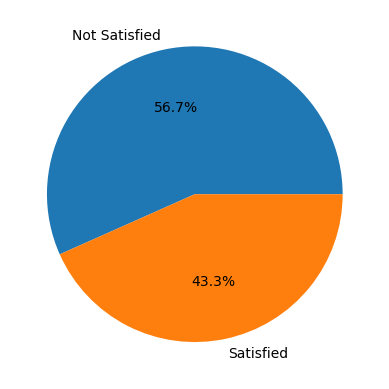

In [17]:
plt.pie(df['satisfaction'].value_counts(), labels = ['Not Satisfied','Satisfied'], autopct='%1.1f%%')
plt.show()

In [18]:
df.columns


Index(['Unnamed: 0', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

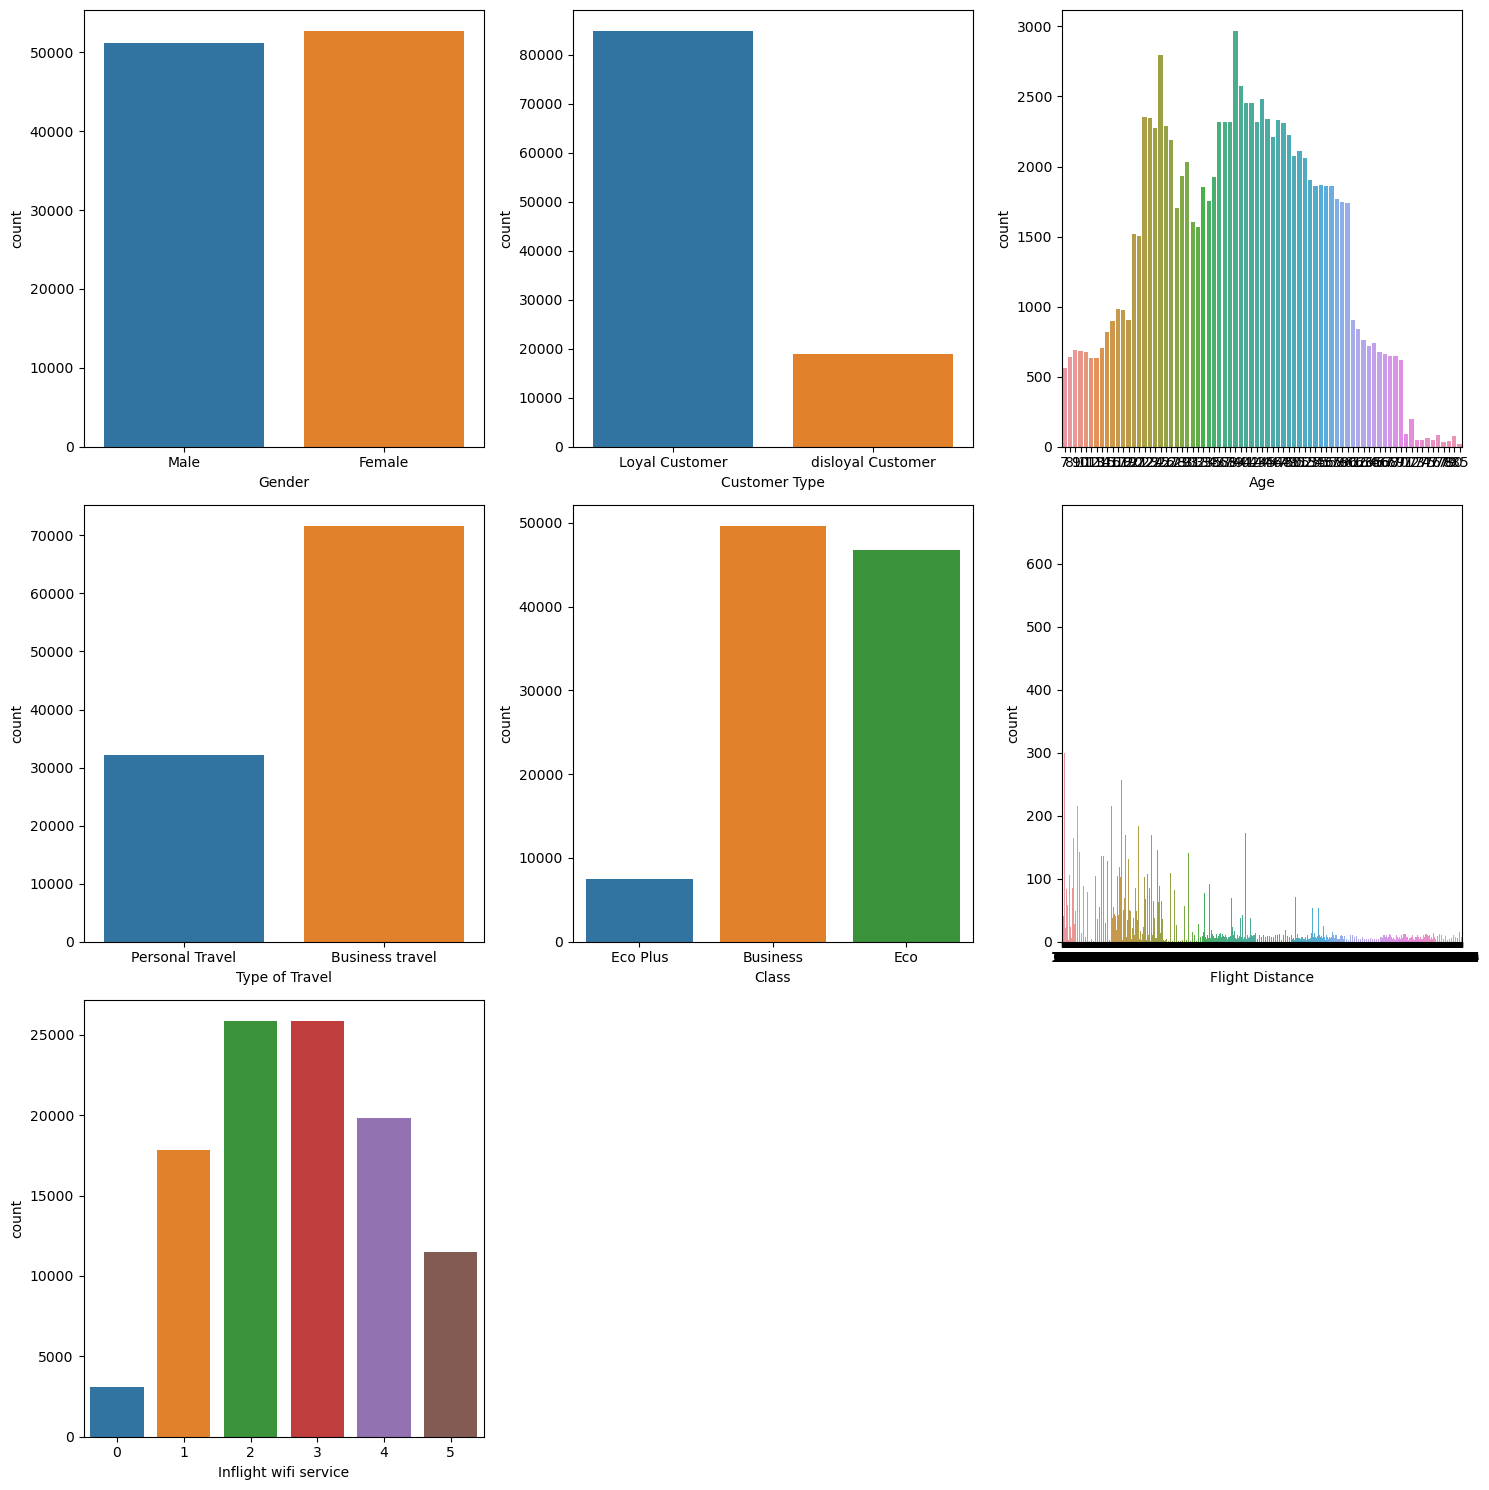

In [19]:
# columnses = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
#        'Flight Distance', 'Inflight wifi service']
# plt.figure(figsize=(15,15))
# for i,j in enumerate(columnses):
#     plt.subplot(3,2,i+1)
#     sns.countplot(x=j,data=df)
# plt.show()    

columnses = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service']
plt.figure(figsize=(15,15))

for i, j in enumerate(columnses):
    plt.subplot(3, 3, i+1)  
    sns.countplot(x=j, data=df)

plt.tight_layout()
plt.show()

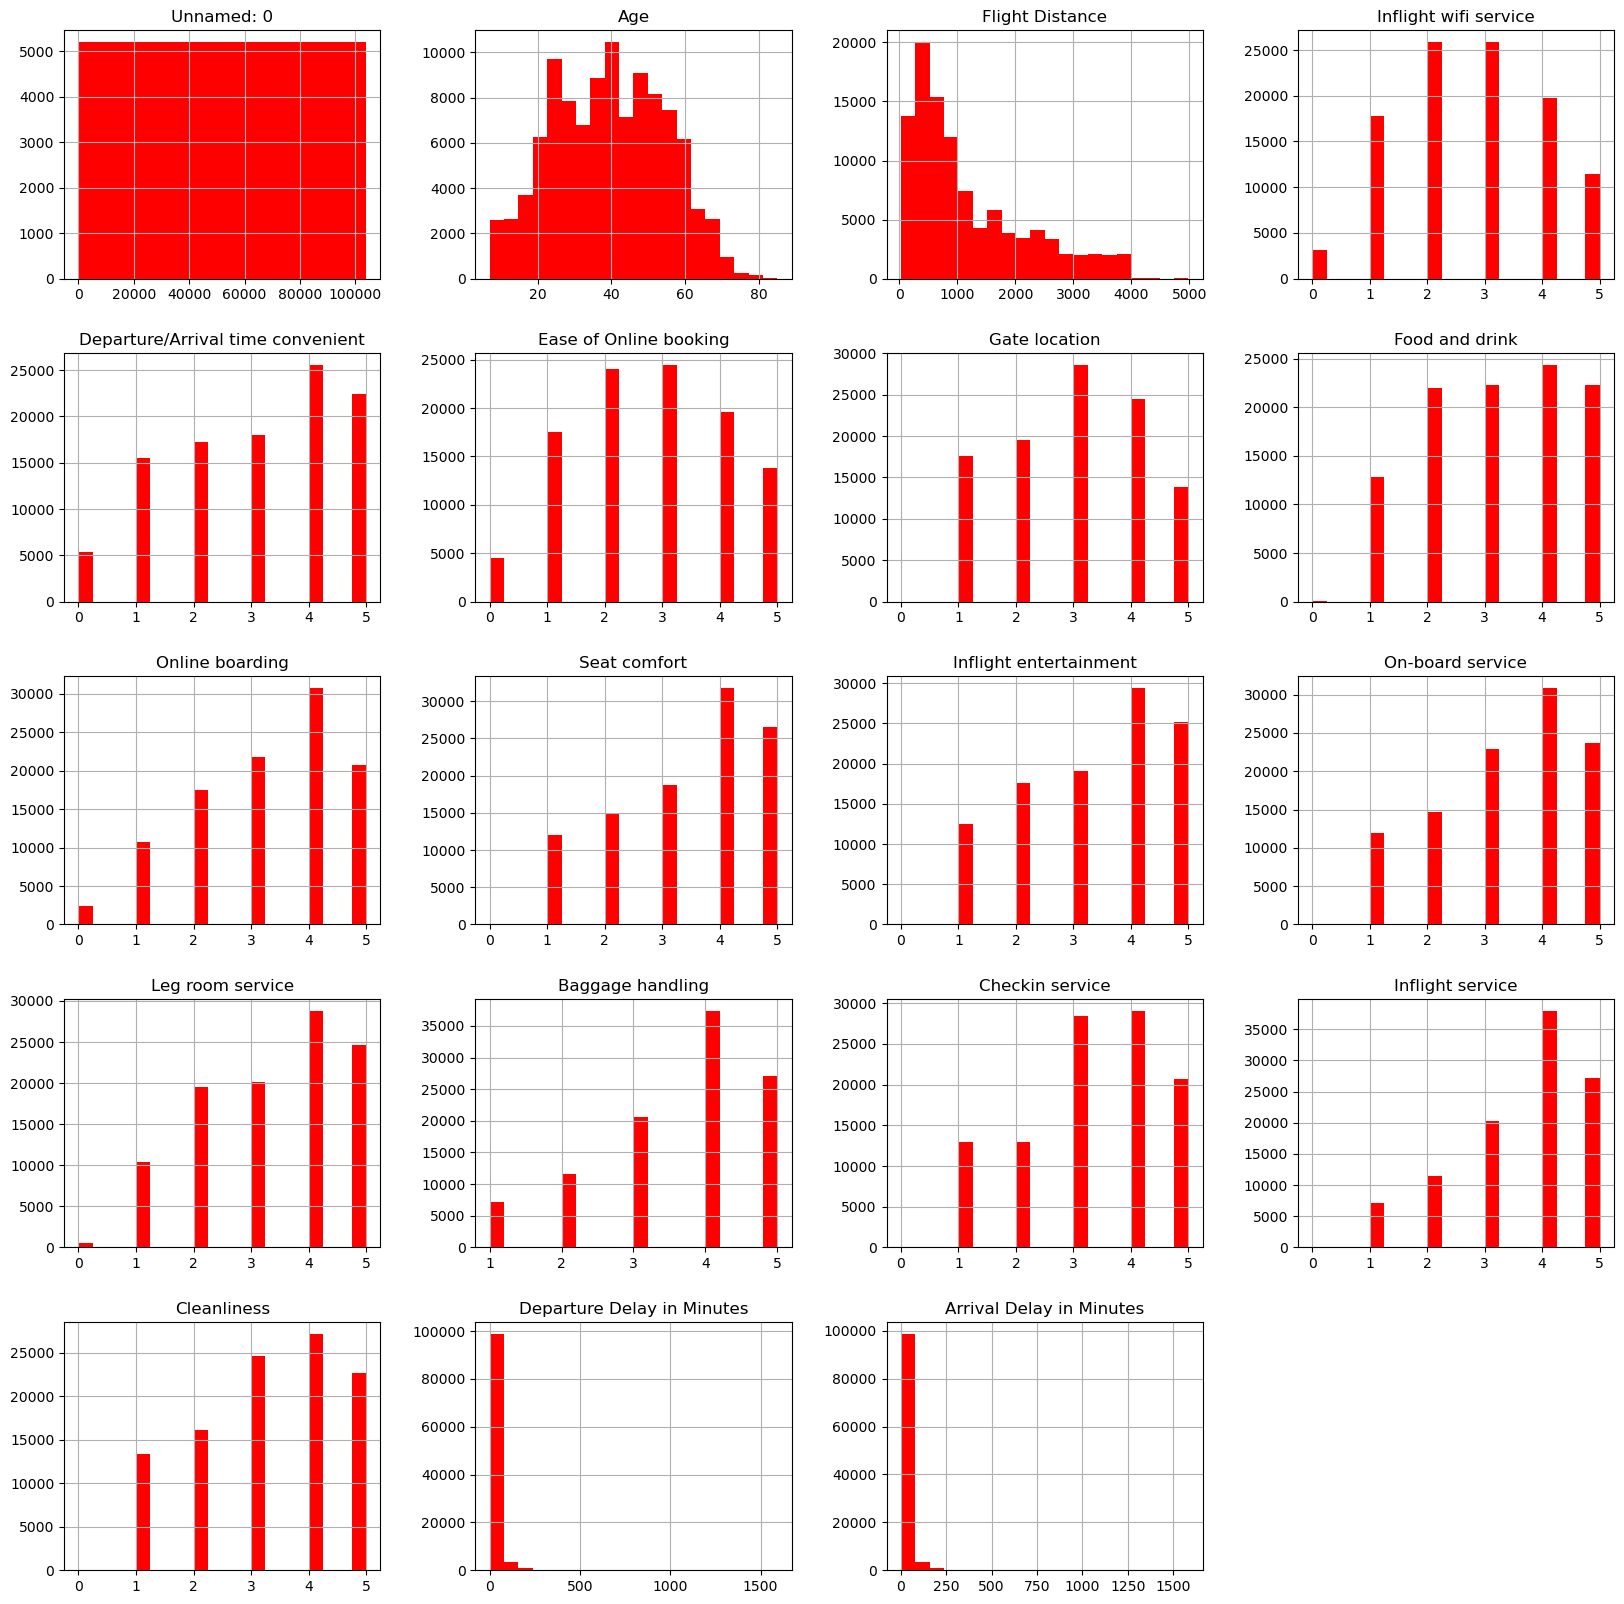

In [20]:
df.hist(bins=20,figsize=(20,20),color='red')
plt.show()

## Coding stict columns


In [21]:
# select columns with text

In [22]:
df.select_dtypes(include='object').columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

In [23]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [24]:
df['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [25]:
df['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [26]:
df['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [27]:
# label_encoder = labelEncoder()
# df.select_dtypes(include='objecty').drop(columns="satisfaction").columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include='object').drop(columns="satisfaction").columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
df.head()                                          




,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [28]:
# # df=df.replace({'Gender':{'Male':1,
# #                       'Famale':2},
# #             'Customer':{'Loyal Customer':1,
# #                         disloyal Customer':2}})
# df = df.replace({'Gender': {'Male': 1, 'Female': 2},
#                  'Customer Type': {'Loyal Customer': 1, 'disloyal Customer': 2}})


In [29]:
df.head()

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [30]:
## HIT MAP

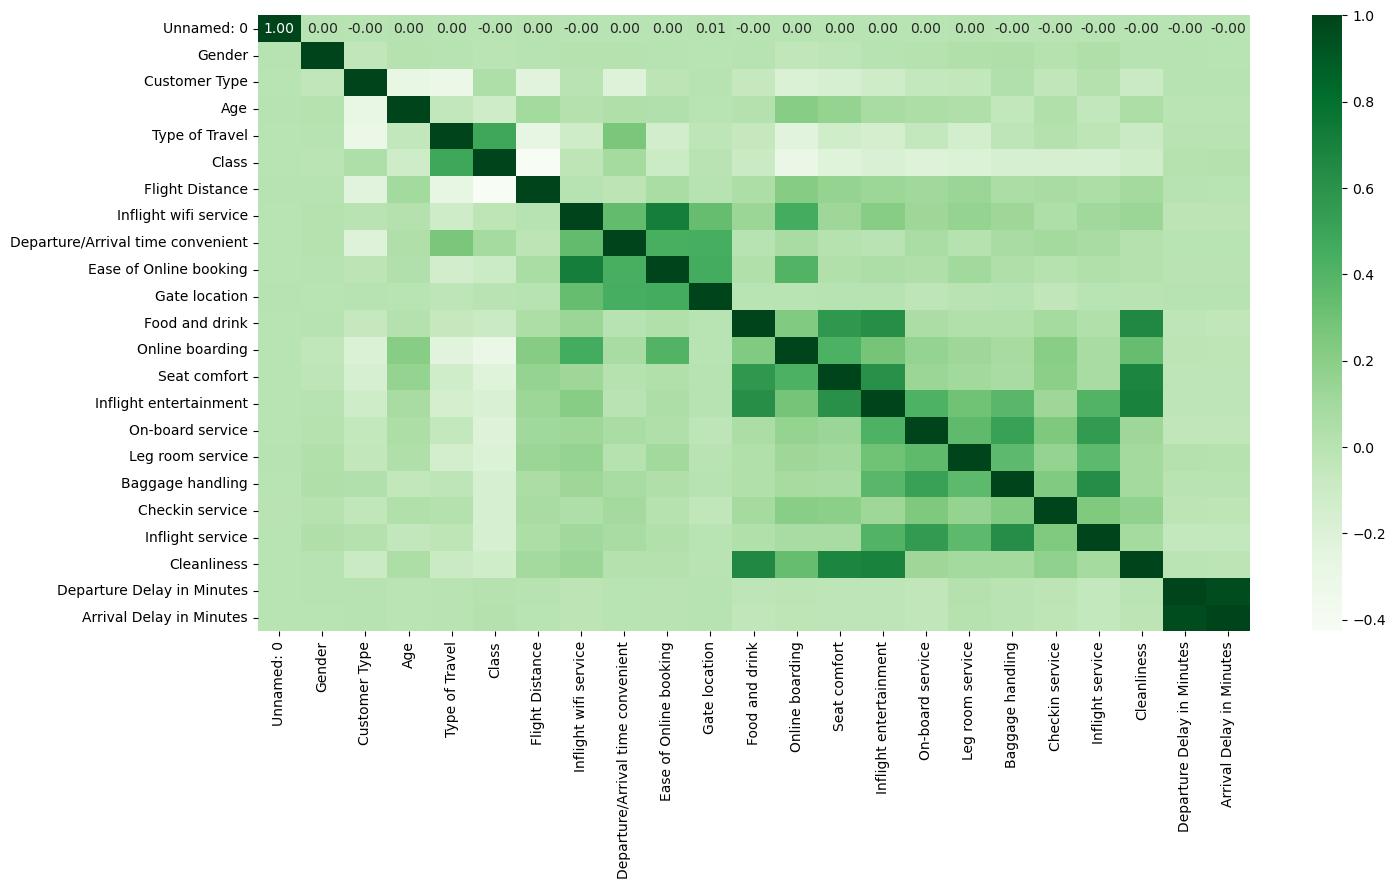

In [31]:
# plt.figure(figsize=(20,8))
# sns.heatmap(df.drop(columns='satisfaction').corr(),annot-True,fmt='.2f',cmap='Greens')
# plt.show()
plt.figure(figsize=(16,8))
sns.heatmap(df.drop(columns='satisfaction').corr(), annot=True, fmt='.2f', cmap='Greens')
plt.show()

In [32]:
df.drop(columns='satisfaction').corr()

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Unnamed: 0,1.000000,0.003978,-0.002844,0.004786,0.000856,-0.001134,0.002794,-0.002490,0.000739,0.001913,0.005073,-0.002162,0.001002,0.000044,0.001363,0.000813,0.004052,-0.000526,-0.004321,-0.000134,-0.001117,-0.000045,-0.000045
Gender,0.003978,1.000000,-0.031732,0.008928,0.006909,-0.012870,0.005828,0.008974,0.009142,0.006951,0.000333,0.005772,-0.042260,-0.026502,0.006117,0.008156,0.031798,0.037391,0.010563,0.039410,0.006505,0.002935,0.000395
Customer Type,-0.002844,-0.031732,1.000000,-0.281674,-0.308333,0.042638,-0.225200,-0.007543,-0.206869,-0.019509,0.006078,-0.059454,-0.189262,-0.159484,-0.109930,-0.056560,-0.047868,0.024723,-0.032177,0.022670,-0.083613,0.004036,0.004741
Age,0.004786,0.008928,-0.281674,1.000000,-0.048524,-0.117370,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012127
Type of Travel,0.000856,0.006909,-0.308333,-0.048524,1.000000,0.487088,-0.267344,-0.105085,0.259763,-0.133511,-0.030700,-0.063439,-0.224803,-0.124399,-0.148199,-0.056543,-0.138803,-0.031321,0.016751,-0.022599,-0.079207,-0.005432,-0.005674
Class,-0.001134,-0.012870,0.042638,-0.117370,0.487088,1.000000,-0.427219,-0.023112,0.089922,-0.094329,-0.004488,-0.077042,-0.297062,-0.210158,-0.179028,-0.207748,-0.197321,-0.163998,-0.157112,-0.158604,-0.125988,0.010281,0.014678
Flight Distance,0.002794,0.005828,-0.225200,0.099461,-0.267344,-0.427219,1.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,0.214869,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002423
Inflight wifi service,-0.002490,0.008974,-0.007543,0.017859,-0.105085,-0.023112,0.007131,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019067
Departure/Arrival time convenient,0.000739,0.009142,-0.206869,0.038125,0.259763,0.089922,-0.020043,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000863
Ease of Online booking,0.001913,0.006951,-0.019509,0.024842,-0.133511,-0.094329,0.065717,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.007972


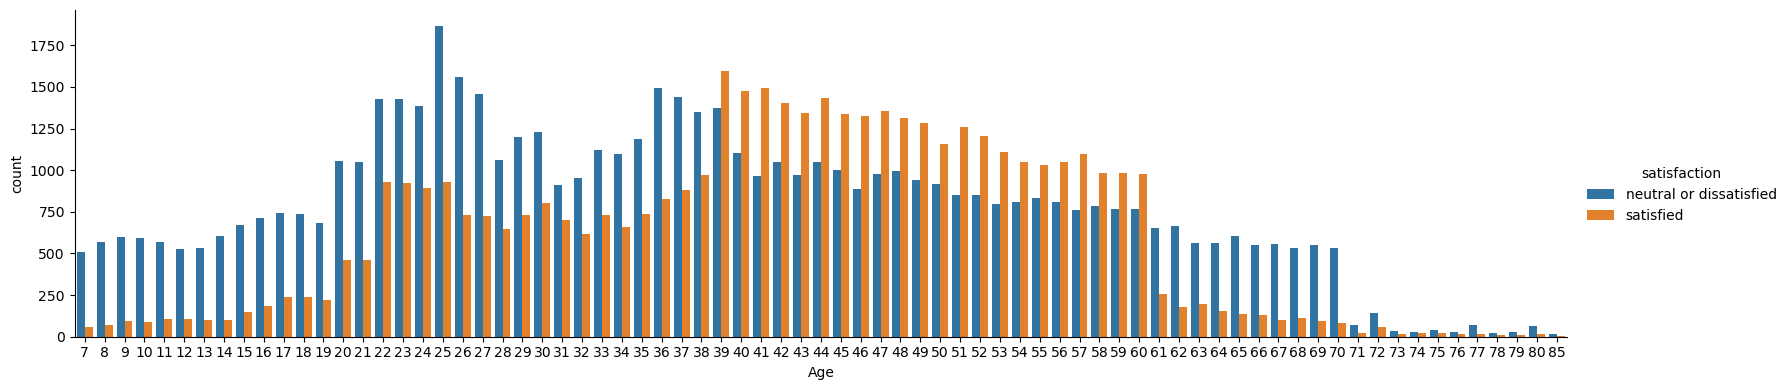

In [33]:
sns.catplot(data=df,x='Age',height=4,aspect=4,kind='count',hue='satisfaction')
plt.show()

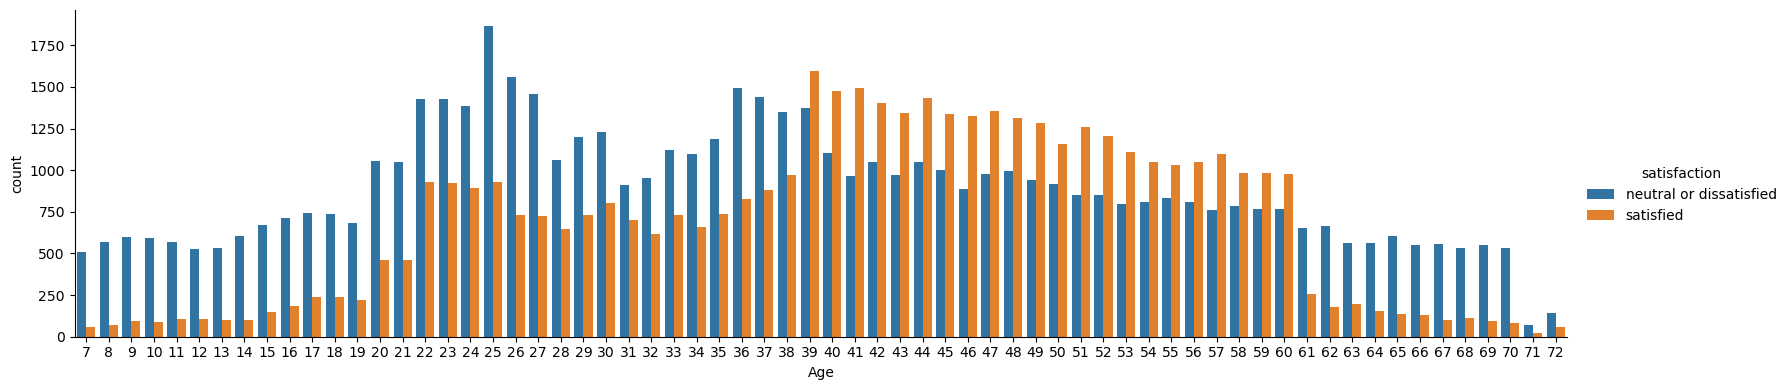

In [34]:
sns.catplot(data=df,x='Age',height=4,aspect=4,kind='count',hue='satisfaction',order=range(7,73))
plt.show()

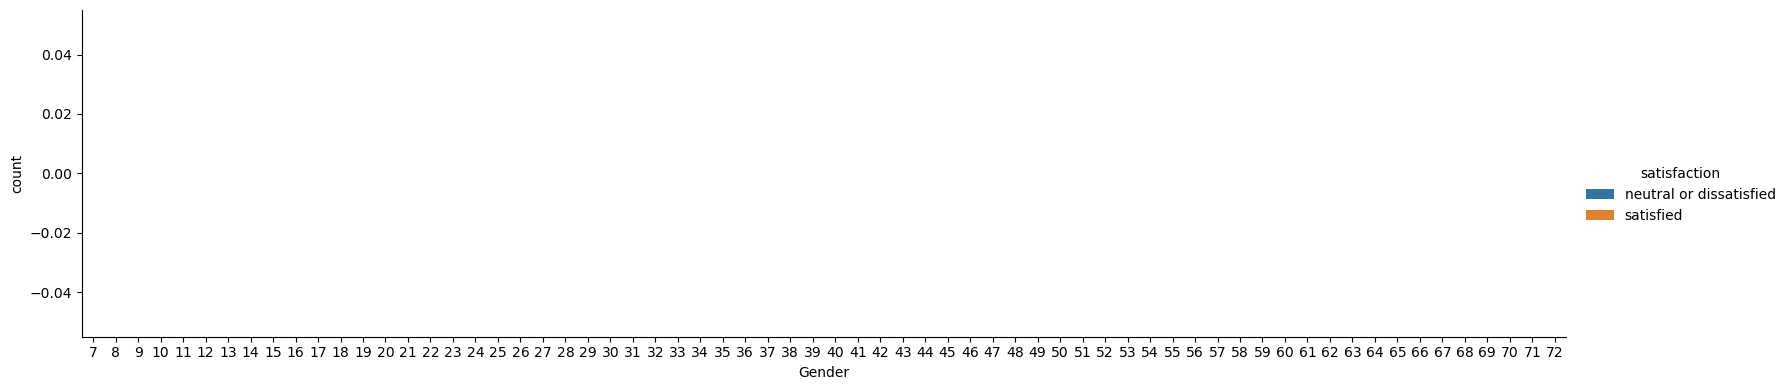

In [35]:
sns.catplot(data=df,x='Gender',height=4,aspect=4,kind='count',hue='satisfaction',order=range(7,73))
plt.show()

## create model 

In [37]:
# разбиваем дата фрейм на X and y


In [38]:
df.columns

Index(['Unnamed: 0', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [39]:
X = df.drop(columns = 'satisfaction')
X.head()

,Unnamed: 0,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,1,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,3,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,4,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0


In [40]:
y = df['satisfaction']
y.head()

0    neutral or dissatisfied
1    neutral or dissatisfied
2                  satisfied
3    neutral or dissatisfied
4                  satisfied
Name: satisfaction, dtype: object

In [41]:
# Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X.shape



(103904, 23)

## оценка точности модели

In [44]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# X.shape

In [45]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
predictions = model.predict(X_test)
len(predictions)

20781

In [47]:
model_score = accuracy_score(y_test, predictions)
model_score

0.9443241422453202

RANDOM FOREST

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_train, y_train)

predictions = model.predict(X_test)
predictions

model_score = accuracy_score(y_test, predictions)
model_score

0.9610702083634088

### KNeighborsClassifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# model = KNeighborsClassifier()
#model = KNeighborsClassifier(n_neighbors=10)
model = KNeighborsClassifier(n_neighbors=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_train, y_train)

predictions = model.predict(X_test)
predictions

model_score = accuracy_score(y_test, predictions)
model_score

0.6585342380058707

In [50]:
# чем больше соседей тем лучше метод работает

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# model = KNeighborsClassifier()
#model = KNeighborsClassifier(n_neighbors=10)
# model = KNeighborsClassifier(n_neighbors=100)
# model = LogisticRegression()
# model = LogisticRegression(max_iter = 1000)
model = LogisticRegression(max_iter = 10000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_train, y_train)

predictions = model.predict(X_test)
predictions

model_score = accuracy_score(y_test, predictions)
model_score

0.8182955584428083

In [52]:
# на 1000 итераций работает лучше всего

FROM HW

In [53]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import make_regression

#data generation
X, y = make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 42)
#dividing data into testing and training samples
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import make_regression

# Data generation
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

# Dividing data into testing and training samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

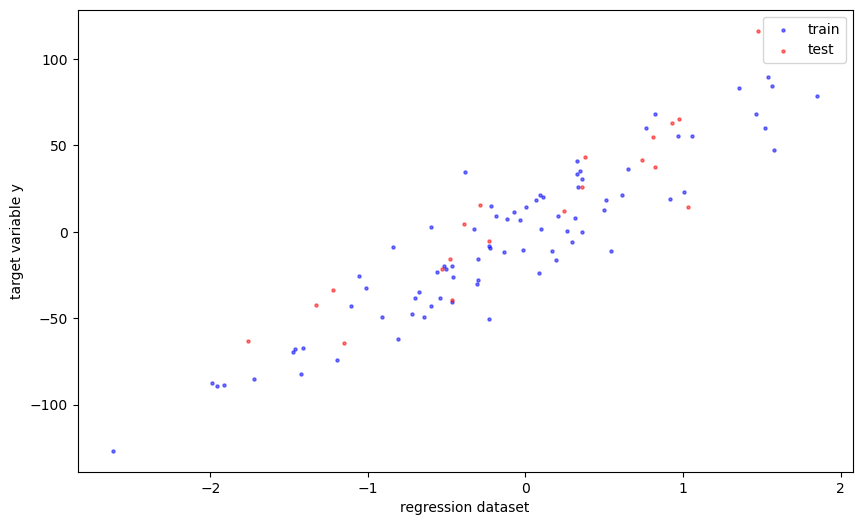

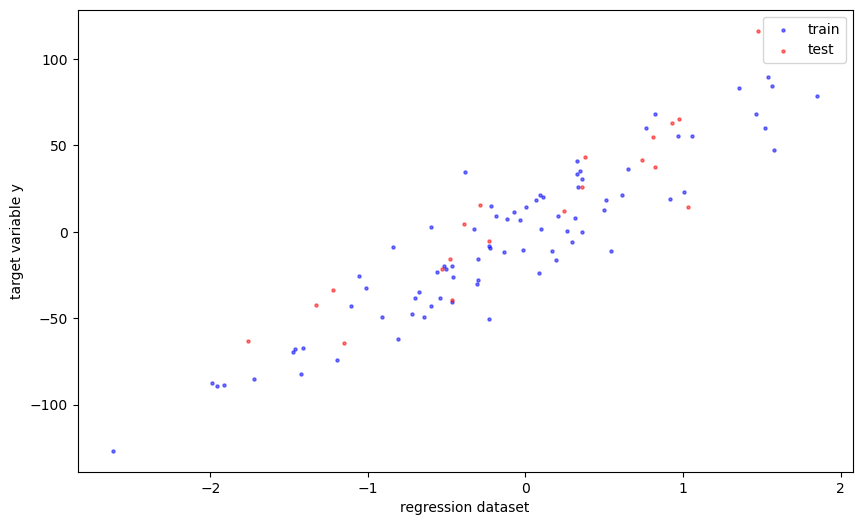

In [54]:
#visualization of generated data
# plt.figure(figsize=(10,6))
# plt.scatter(X_train, y_train, color = 'blue', label = 'test', s = 5, alpha = 0.5)
# plt.scatter(X_train, y_train, color = 'red', label = 'test', s = 5, alpha = 0.5)
# plt.xlable('regression dataset')
# plt.ylabel('target variable y')
# plt.legend()
# plt.show()
# import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='train', s=5, alpha=0.5)
plt.scatter(X_test, y_test, color='red', label='test', s=5, alpha=0.5)
plt.xlabel('regression dataset')  # Corrected line
plt.ylabel('target variable y')
plt.legend()

plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='train', s=5, alpha=0.5)
plt.scatter(X_test, y_test, color='red', label='test', s=5, alpha=0.5)
plt.xlabel('regression dataset')
plt.ylabel('target variable y')
plt.legend()

plt.show()

In [57]:
import pandas as pd
!pip install xgboost
from sklearn.liner_model import(
    linearRegression, Lasso, Ridge, BayesianRidge, OrthogonalMatchingPursuit,
    PassiveAggressiveRegressor, HuberRegressor, ElasticNet
)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Initialization of models

models = {
    "Линейная регрессия": LinearRegression(),
    "LASSO": lasso(alpha=0.1),
    "Ridge": Ridge(alpha=0.5),
    "Баесовская линейная регрессия": BayesianRidge(),
    "Ортогональнный поиск соответствия": OrthogonalMatchingPursuit(),
    "Пассивно-агрессивный регрессор": PassiveAggressiveRegressor(),
    "Регрессор Губера": HuberRegressor(),
    "Регрессор К-ближайших соседей": KNeighborsRegressor(),
    "Elastic Net": ElasticNet(),
    "Фиктивный регрессор": DummyRegressor(strategy='mean'),
    "Регрессор дерева решений": DecisionTreeRegressor(),
    "Регрессор случайного леса": RandomForestRegressor(),
    "Регрессор Extra Trees": ExtraTreesRegressor(),
    "Регрессор Gradient Boosting": GradientBoostingRegressor(),
    "Регрессор LGBM": LGBMRegressor(),
    "Экстремальный градиентный бустинг": XGBRegressor(),
    "Регрессор AdaBoost": AdaBoostRegressor(),
    "Регрессор CatBoost": CatBoostRegressor(verbose=0)
}

#from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge, OrthogonalMatchingPursuit, PassiveAggressiveRegressor, HuberRegressor, ElasticNet
from sklearn.linear_model import (
    LinearRegression, Lasso, Ridge, BayesianRidge, OrthogonalMatchingPursuit,
    PassiveAggressiveRegressor, HuberRegressor, ElasticNet
)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
#from lightgbm import LGBMRegressor
#from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Инициализация моделей
models = {
    "Линейная регрессия": LinearRegression(),
    "LASSO": Lasso(alpha=0.1),
    "Ridge": Ridge(alpha=0.5),
    "Баесовская линейная регрессия": BayesianRidge(),
    "Ортогональный поиск соответствия": OrthogonalMatchingPursuit(),
    "Пассивно-агрессивный регрессор": PassiveAggressiveRegressor(),
    "Регрессор Губера": HuberRegressor(),
    "Регрессор К-ближайших соседей": KNeighborsRegressor(),
    "Elastic Net": ElasticNet(),
    "Фиктивный регрессор": DummyRegressor(strategy='mean'),
    "Регрессор дерева решений": DecisionTreeRegressor(),
    "Регрессор случайного леса": RandomForestRegressor(),
    "Регрессор Extra Trees": ExtraTreesRegressor(),
    "Регрессор Gradient Boosting": GradientBoostingRegressor(),
    "Регрессор LGBM": LGBMRegressor(),
    "Экстремальный градиентный бустинг": XGBRegressor(),
    "Регрессор AdaBoost": AdaBoostRegressor(),
    "Регрессор CatBoost": CatBoostRegressor(verbose=0)
}

result = {}

# Обучение моделей и расчет метрик
for name, model in models.items():
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_predict)
    mse = mean_squared_error(y_test, y_predict)
    r2 = r2_score(y_test, y_predict)

result[name] = {
    "model":model,
    "MAE":mae,
    "NSE":mse,
    "R2":r2
}

# Сортировка X_test и y_predict по значению X_test
sort_idx = np.argsort(X_test.flatten())
X_test_sorted = X_test[sort_idx]
y_predict_sorted = y_predict[sort_idx]

plt.figure(figsize=(10,6))
plt.scatter(X_train, y_train, color='blue', label='обучающая выборка', s = 5, alpha=0.5)
plt.scatter(X_test, y_test, color='red', label='Тестовая  выборка', s = 5, alpha=0.5)
plt.plot(X_test_sorted, y_predict_sorted, color = 'green', label = "Предсказание модели")
plt.title(f'{name}')
plt.xlabel('Признак X')
plt.ylabel("Целевая переменная y")
plt.legend()
plt.show()

print(f"Модель: {name}, MAE: {mae:.2f}, MSE: {mse:.2f}, R^2: {r2:.2f}")

result_df = pd.DataFrame.from_dict({(i): result[i] for i in result.keys()}, orient='index')
result_df = result_df.drop(columns=['job_title'])
display(result_df.sort_values(['R2'], ascending=False))



           
           


ModuleNotFoundError: No module named 'sklearn.liner_model'